# High School Student Performance and  Demographics

### Group 29

### Presented by: Sarah Derhy and Shirel Amar and Ziv Katz

 #### Github link : https://github.com/SarahDerhy/Project1/tree/main
#### Kaggle Link: https://www.kaggle.com/datasets/dillonmyrick/high-school-student-performance-and-demographics

In [1]:
from IPython.display import Image, display
urlpic = "https://raw.githubusercontent.com/SarahDerhy/Project1/main/Premium%20Photo%20%7C%20Group%20of%20students%20happy%20to%20be%20back%20at%20university.jpg"
display(Image(url=urlpic, width=1500))




###  Reading data

In [2]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [3]:
url= 'https://raw.githubusercontent.com/SarahDerhy/Project1/main/student_math_clean.csv'
student_df = pd.read_csv(url)

In [4]:
student_df=student_df.copy()

In [5]:
student_df.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
student_df.shape

(395, 34)

In [7]:
student_df.isnull().sum().to_frame('nulls')

,nulls
student_id,0
school,0
sex,0
age,0
address_type,0
family_size,0
parent_status,0
mother_education,0
father_education,0
mother_job,0


#### There is no missing values in our file

In [8]:
student_df.dtypes

student_id                int64
school                   object
sex                      object
age                       int64
address_type             object
family_size              object
parent_status            object
mother_education         object
father_education         object
mother_job               object
father_job               object
school_choice_reason     object
guardian                 object
travel_time              object
study_time               object
class_failures            int64
school_support           object
family_support           object
extra_paid_classes       object
activities               object
nursery_school           object
higher_ed                object
internet_access          object
romantic_relationship    object
family_relationship       int64
free_time                 int64
social                    int64
weekday_alcohol           int64
weekend_alcohol           int64
health                    int64
absences                  int64
grade_1 

In [9]:
student_df.columns

Index(['student_id', 'school', 'sex', 'age', 'address_type', 'family_size',
       'parent_status', 'mother_education', 'father_education', 'mother_job',
       'father_job', 'school_choice_reason', 'guardian', 'travel_time',
       'study_time', 'class_failures', 'school_support', 'family_support',
       'extra_paid_classes', 'activities', 'nursery_school', 'higher_ed',
       'internet_access', 'romantic_relationship', 'family_relationship',
       'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'grade_1', 'grade_2', 'final_grade'],
      dtype='object')

## 1 - The impact of school support on aspirations to pursue higher education

<Axes: xlabel='final_grade', ylabel='count'>

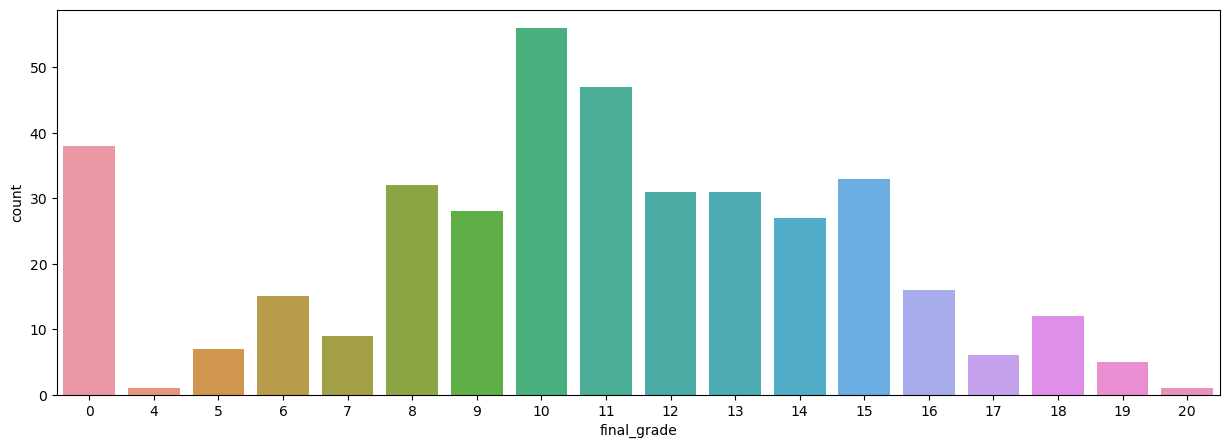

In [10]:
fig, axes = plt.subplots(figsize=(15, 5))
sns.countplot(data=student_df, x='final_grade')


### We can see the distribution among all final grades. We're going to take a look on the students who failed their test (under 10).

In [11]:
low_grade=student_df[student_df['final_grade']<10]

In [12]:
student_df['AtLeastTwoYes'] = student_df[['extra_paid_classes', 'school_support', 'internet_access']].apply(lambda x: 'Yes' if (x == 'yes').sum() >= 2 else 'No', axis=1)
student_df[['AtLeastTwoYes']]

,AtLeastTwoYes
0,No
1,No
2,Yes
3,Yes
4,No
...,...
390,No
391,No
392,No
393,No


Here we used ChatGPT to create a fonction who will add to our new column "Yes" if the student has acces to at least 2 extra tutoring (School tutoring, extra paid class, access to internet) or "No" if not.

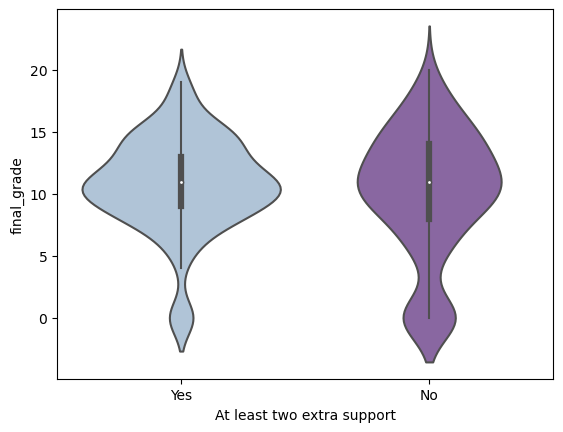

In [13]:
sns.violinplot(y="final_grade", x="AtLeastTwoYes", data=student_df, order= ["Yes", "No"], palette='BuPu')
plt.xlabel("At least two extra support")
plt.show()

### The graph shows the distribution of students' final grades based on their extra tutoring access. The distributions is represented by violins indicating the density of final grades, where the wider parts of the violins represent an higher concentration of grades in that range.

In [14]:
study_time_order = ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"]

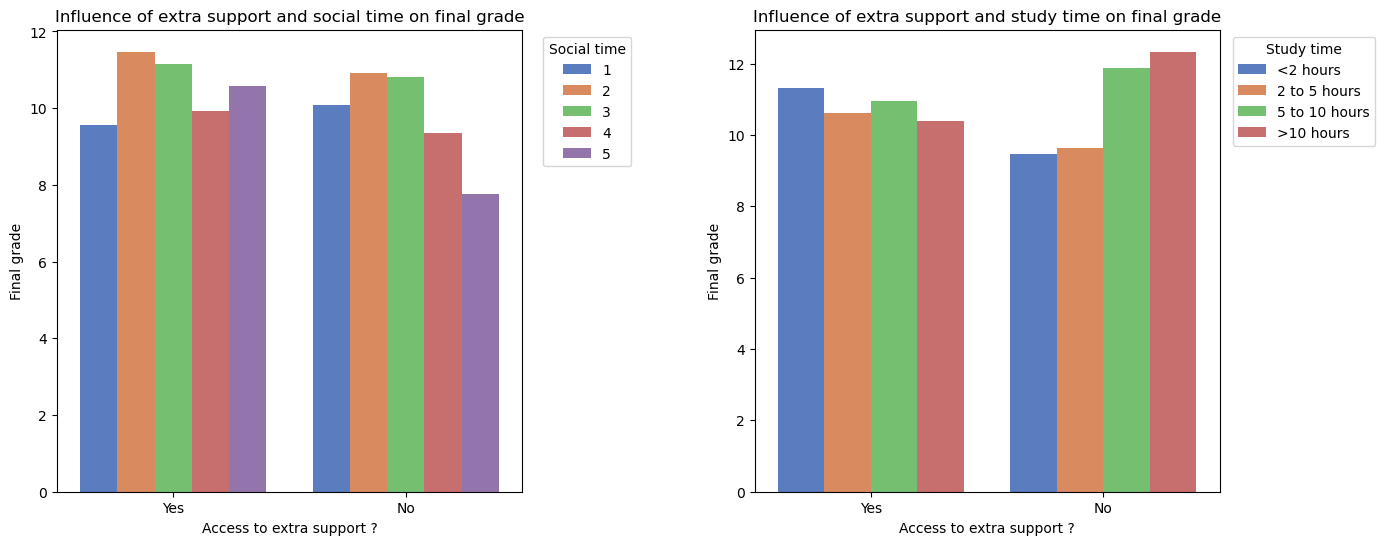

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x="AtLeastTwoYes", y="final_grade", hue="social", errorbar=None, data=student_df, ax=ax[0],order= ["Yes", "No"],palette='muted')
ax[0].set_xlabel("Access to extra support ?")
ax[0].set_ylabel("Final grade")
ax[0].set_title("Influence of extra support and social time on final grade")
ax[0].legend(title= "Social time", loc='upper right', bbox_to_anchor=(1.25, 1)) 


sns.barplot(x="AtLeastTwoYes", y="final_grade", hue="study_time", errorbar=None, data=student_df,hue_order= study_time_order ,ax=ax[1],order= ["Yes", "No"],palette='muted')
ax[1].set_xlabel("Access to extra support ?")
ax[1].set_ylabel("Final grade")
ax[1].set_title("Influence of extra support and study time on final grade")
ax[1].legend(title= "Study time", loc='upper right', bbox_to_anchor=(1.35, 1))


plt.subplots_adjust(wspace=0.5)

plt.show()


### We see that study or social time do not always influence directly on final grade. We want to look deeper to see if something else comes into play. We focused on people who received 0 to their exam and have no extra support to understand more.

In [16]:
filtered_zero_df =student_df[(student_df['final_grade'] == 0)]
filtered_zero_df.shape



(38, 35)

### People who received 0 to their exam represent 10% of our students, which is a significant percentage.

In [17]:
study_time_mapp={"2 hours":1,"2 to 5 hours":2, "5 to 10 hours":3, ">10 hours":4}
student_df["study_time_num"]= student_df["study_time"].map(study_time_mapp)


In [18]:
filtered_zero_no_df = student_df[(student_df['AtLeastTwoYes'] == 'No') & (student_df['final_grade']== 0)]
filtered_zero_yes_df = student_df[(student_df['AtLeastTwoYes'] == 'Yes') & (student_df['final_grade']==0 )]


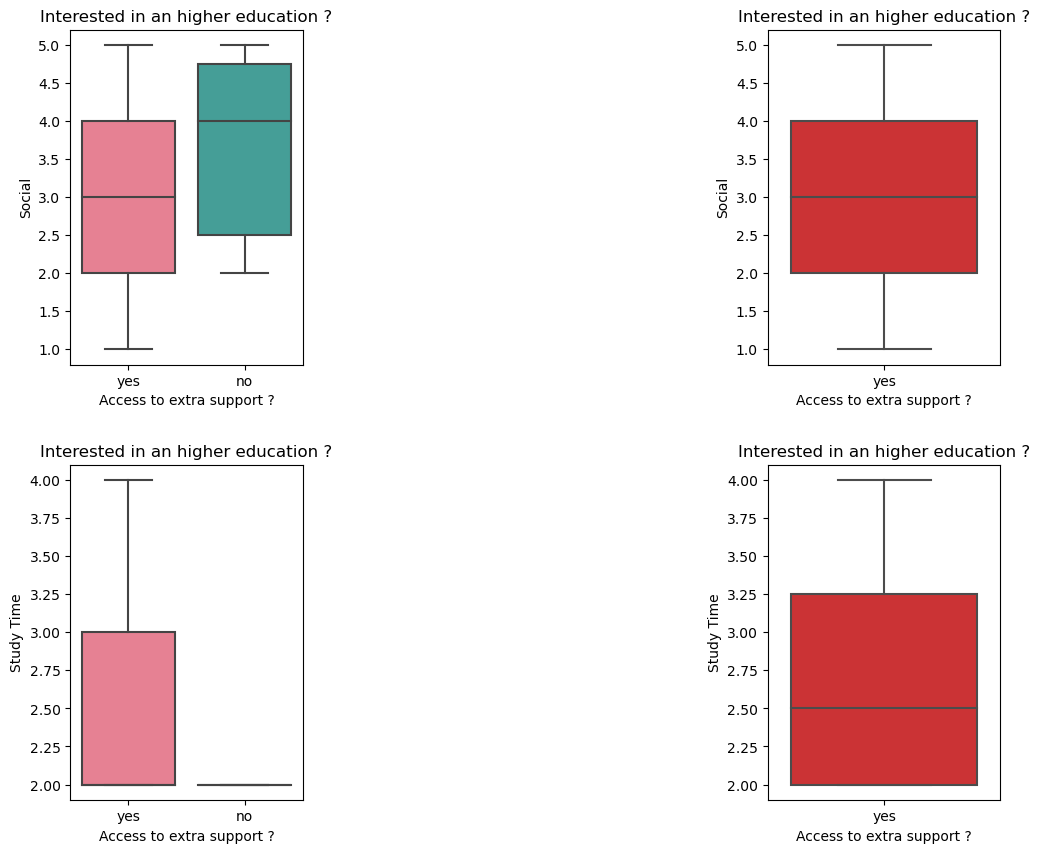

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))


sns.boxplot( x = "higher_ed", y = "social", data=filtered_zero_no_df, ax=ax[0,0],palette='husl')
sns.boxplot(x = "higher_ed", y = "social",data=filtered_zero_yes_df, ax=ax[0,1],palette='Set1')
sns.boxplot( x = "higher_ed", y = "study_time_num",data= filtered_zero_no_df, ax=ax[1,0],palette='husl')
sns.boxplot( x = "higher_ed", y = "study_time_num",data= filtered_zero_yes_df, ax=ax[1,1],palette='Set1') 

plt.subplots_adjust(wspace=2)
plt.subplots_adjust(hspace=0.3)

ax[0,0].set_xlabel('Access to extra support ?')
ax[0,1].set_xlabel('Access to extra support ?')
ax[1,0].set_xlabel('Access to extra support ?')
ax[1,1].set_xlabel('Access to extra support ?')

ax[0,0].set_ylabel("Social")
ax[0,1].set_ylabel("Social")
ax[1,0].set_ylabel("Study Time")
ax[1,1].set_ylabel("Study Time")

ax[0,0].set_title("Interested in an higher education ?")
ax[0,1].set_title("Interested in an higher education ?")
ax[1,0].set_title("Interested in an higher education ?")
ax[1,1].set_title("Interested in an higher education ?")


plt.show()

### Conclusion 1: The graphs show that students with at least two extra tutoring  are all motivated to pursue higher education, even with grades of 0. By contrast, those without aids are not all so willing, and spend more time going out than working.

### To sum up:
### -Without extra support: Less inclined to study and spend more time going out.
### -With extra support: Motivated to study and study more.
### Willingness to pursue higher education therefore seems to be a key factor in  motivation to success.

#### After comparing the data we have, and the potential academic and social factors, we can see that academic factors do not influence the final grade. however, social factors have a more significant influence on our students' grades.

## 2 - The repercussions of alcohol on class failures among minors.

#### In this section we look at the impact of alcohol on minors.

In [20]:
student_df["total_alcohol"] = student_df[['weekday_alcohol', 'weekend_alcohol']].mean(axis=1)

student_df[["total_alcohol"]]

,total_alcohol
0,1.0
1,1.0
2,2.5
3,1.0
4,1.5
...,...
390,4.5
391,3.5
392,3.0
393,3.5


In [21]:
minor= student_df[(student_df['age'] < 18)]

### Here we've created a new column that gives the average level of alcohol during the week (including weekends). We'll now take a look at what impact this has on the level of absence of underage students.

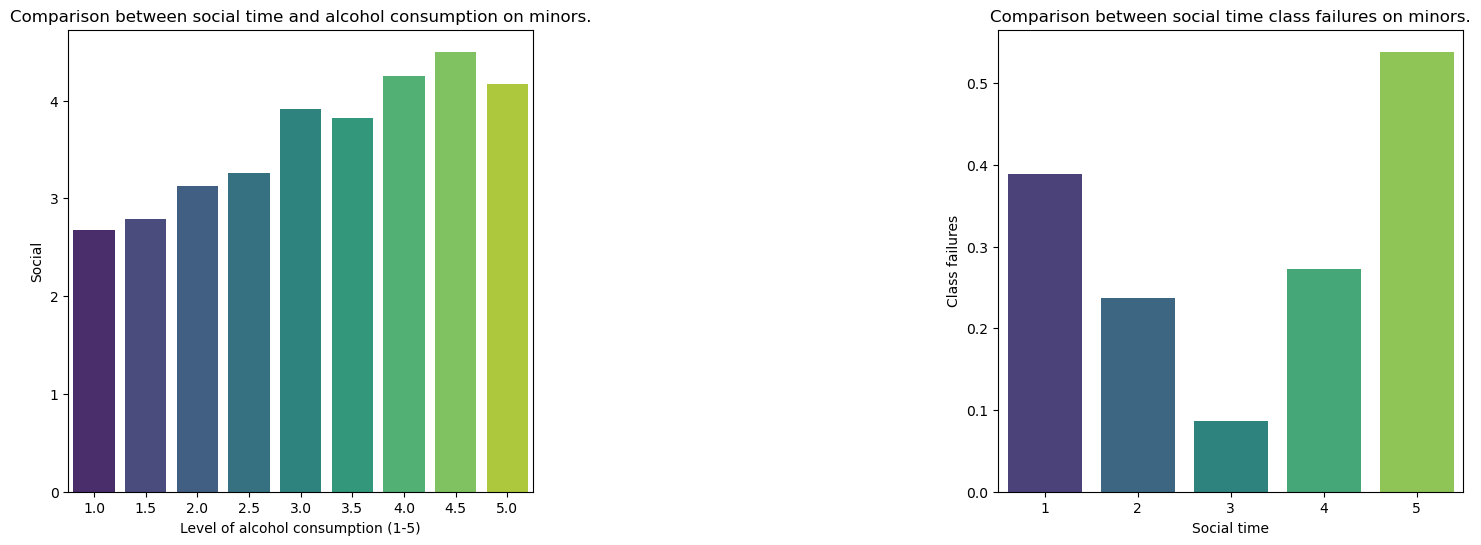

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x='total_alcohol', y='social', data=minor, palette='viridis', ax=ax[0], errorbar= None)
ax[0].set_xlabel("Level of alcohol consumption (1-5)")
ax[0].set_ylabel("Social")
ax[0].set_title("Comparison between social time and alcohol consumption on minors.")  

plt.subplots_adjust(wspace=1)

sns.barplot(x='social', y='class_failures', data=minor, palette='viridis', ax=ax[1], errorbar= None)
ax[1].set_xlabel("Social time")
ax[1].set_ylabel("Class failures")
ax[1].set_title("Comparison between social time class failures on minors.")  
plt.show()



### Conclusion 2: We studied underage students who drank alcohol, as this was less common than among adults. Our graphs show that an elevated level of alcohol consumption is associated with a more active social life. However, an overly intense or moderate social life increases the risk of class failure. In conclusion, it's all a question of balance: drinking too much can lead to failure, and not drinking at all doesn't necessarily guarantee success.

## 3 - Factors influencing school performance of rural residents

#### Here we'll try to find out which extra-curricular factors influence the final exam grade.

In [23]:
counted_rural_urban= student_df["address_type"].value_counts()
counted_rural_urban

address_type
Urban    307
Rural     88
Name: count, dtype: int64

In [24]:
percentage_rural_urban= counted_rural_urban/ len(student_df)*100

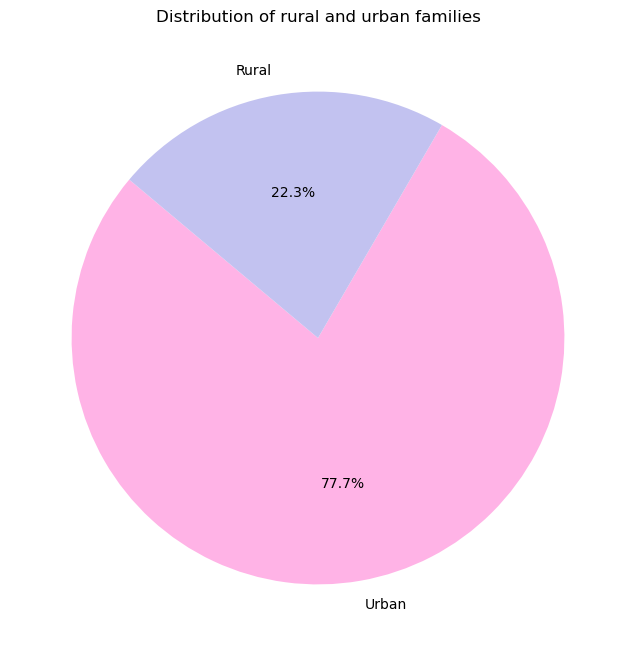

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(percentage_rural_urban, labels=percentage_rural_urban.index, autopct='%1.1f%%',startangle= 140 ,colors=['#ffb3e6', '#c2c2f0'])
plt.title('Distribution of rural and urban families')
plt.show()

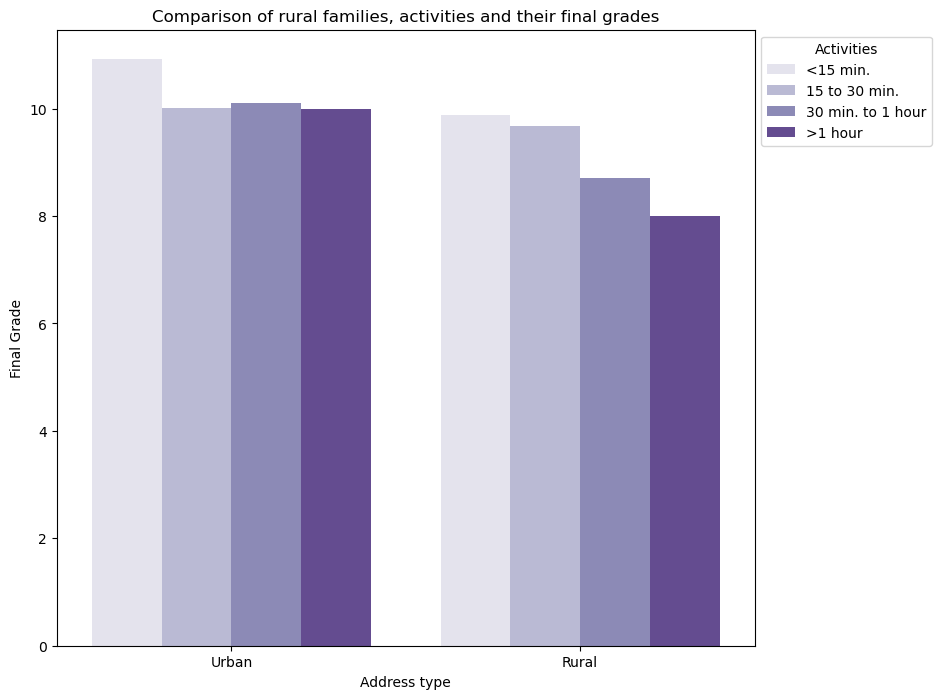

In [26]:
plt.figure(figsize=(9, 8))
sns.barplot(x='address_type', y='final_grade',hue='travel_time', data=student_df,hue_order=["<15 min.","15 to 30 min.","30 min. to 1 hour",">1 hour"], palette='Purples',errorbar=None)
plt.xlabel("Address type")
plt.ylabel("Final Grade")
plt.title("Comparison of rural families, activities and their final grades")
plt.legend(title='Activities', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

###  Conclusion 3 : We find that travel time doesn't affect people who live in cities, while it does have an influence on people living in rural areas. So we're going to focus on people living in the countryside whose commute time exceeds one hour.

In [27]:
rural_long_travel = student_df[(student_df["address_type"] == 'Rural') & (student_df['travel_time']==">1 hour" )]

<function matplotlib.pyplot.show(close=None, block=None)>

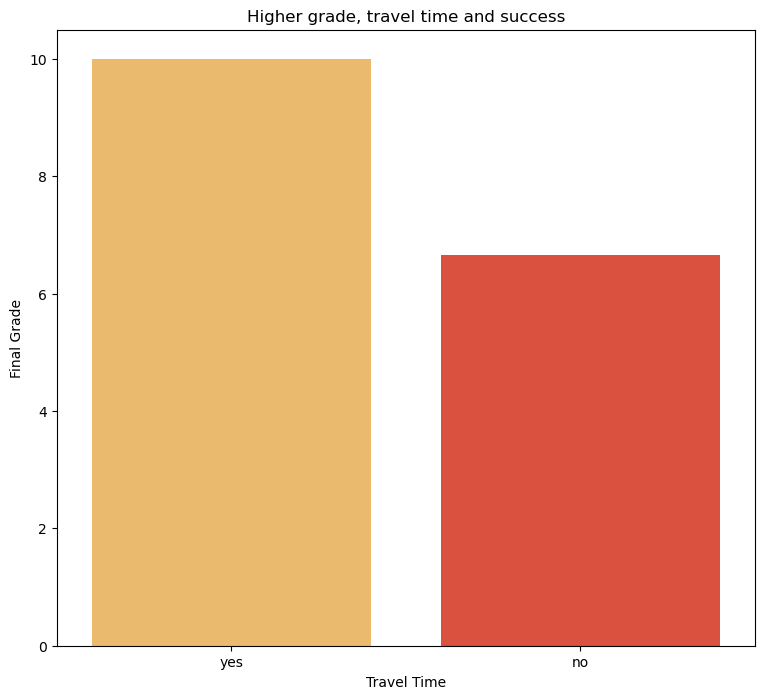

In [28]:
plt.figure(figsize=(9, 8))
sns.barplot (x='activities', y='final_grade', data=rural_long_travel, palette='YlOrRd',errorbar=None)
plt.xlabel("Travel Time")
plt.ylabel("Final Grade")
plt.title("Higher grade, travel time and success")
plt.show

Commuting time affects people living in rural areas. However, we observe that people with more than an hour's commute who take part in activities tend to get better marks than those who do not. We can therefore conclude that activities have a positive impact on school results.

## Things we tried but didn't achieve to anything:

Conclusion 1:

/Users/shirelamar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shirelamar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shirelamar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


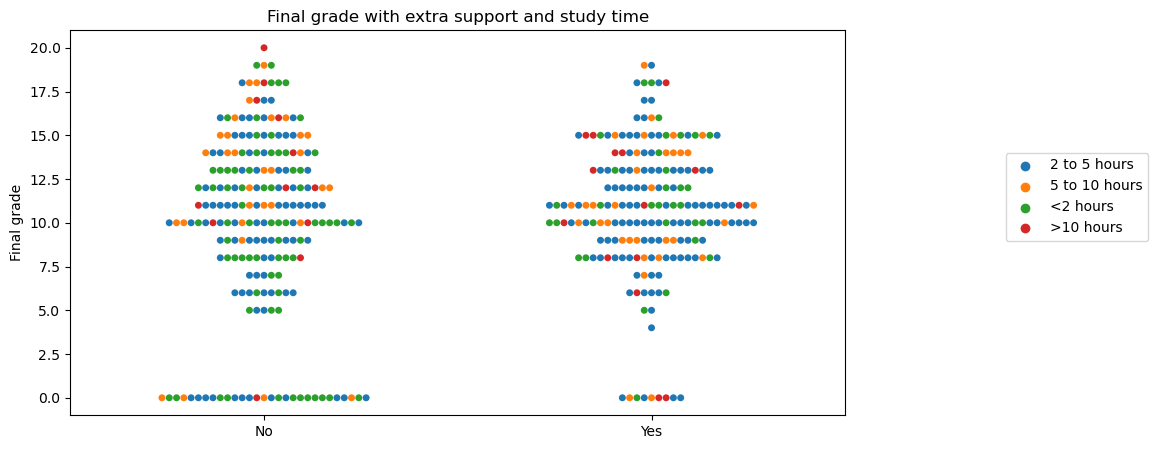

In [29]:
plt.figure(figsize=(10,5))
sns.swarmplot(x="AtLeastTwoYes", y="final_grade", hue="study_time", data=student_df)
plt.xlabel("")
plt.ylabel("Final grade")
plt.title("Final grade with extra support and study time")
plt.legend(loc='upper right',bbox_to_anchor=(1.4,0.7 ))
plt.show()



Conclusion 2:

In [30]:
family_size_map={"Less or equal to 3":0,"Greater than 3":1}
student_df["family_size_num"] = student_df["family_size"].map(family_size_map)



In [31]:
all_features=['absences', 'class_failures', 'final_grade','family_size_num','health']

In [32]:
subset_df = student_df.loc[:, ['absences', 'class_failures', 'final_grade','family_size','health']]

In [33]:
subset_df = student_df.loc[:, ['absences', 'class_failures', 'final_grade','family_size_num','health']]

In [34]:
correlation_matrix=subset_df.corr(numeric_only = False, method = 'spearman' ).round(2)
subset_correlation_matrix = correlation_matrix[all_features].transpose()
subset_correlation_matrix

,absences,class_failures,final_grade,family_size_num,health
absences,1.00,0.10,0.02,NaN,-0.07
class_failures,0.10,1.00,-0.36,NaN,0.08
final_grade,0.02,-0.36,1.00,NaN,-0.05
family_size_num,NaN,NaN,NaN,NaN,NaN
health,-0.07,0.08,-0.05,NaN,1.00


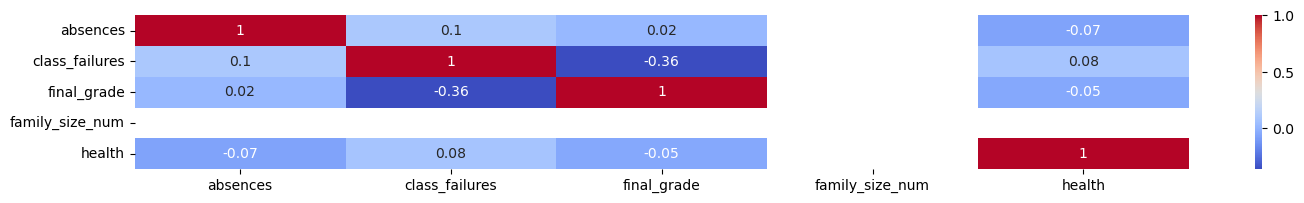

In [35]:
plt.figure(figsize=(17,2))
sns.heatmap(data=subset_correlation_matrix,cmap='coolwarm', annot=True, xticklabels=subset_df.columns.tolist(), yticklabels=all_features)
plt.show()

Conclusion 3: 

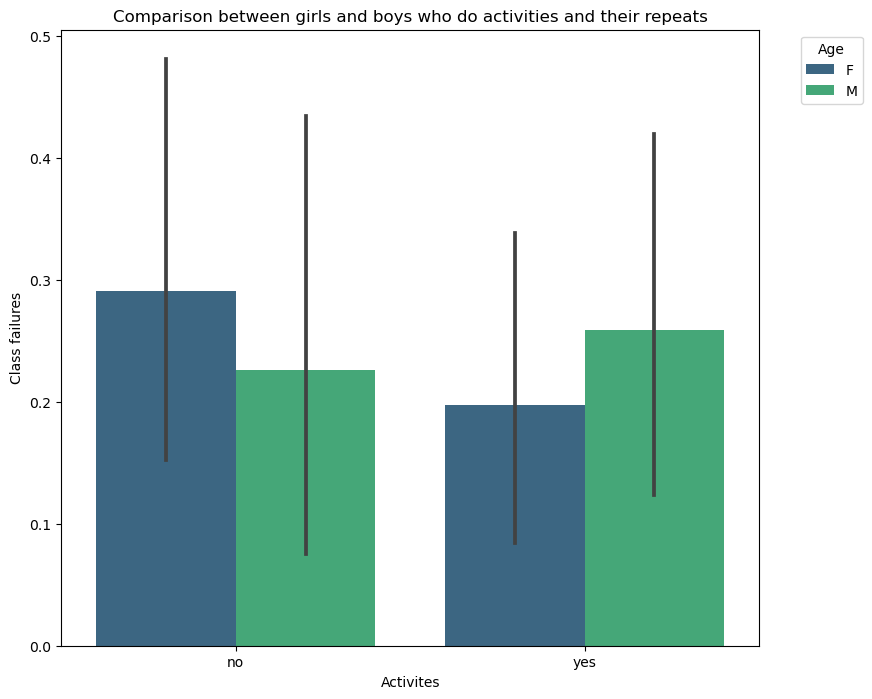

In [36]:
plt.figure(figsize=(9, 8))
sns.barplot(x='activities', y='class_failures', hue='sex', data=minor, palette='viridis')

plt.xlabel("Activites")
plt.ylabel("Class failures")
plt.title("Comparison between girls and boys who do activities and their repeats")

plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [37]:
higher_ed_mapp={'no':0,'yes':1}
student_df["higher_ed_num"]= student_df["higher_ed"].map(higher_ed_mapp)

In [38]:
parent_job_mapping={"at_home":0,"services":1, "teacher":2, "health":3, "other":4}
student_df["mother_job_num"]=student_df["mother_job"].map(parent_job_mapping)
student_df["father_job_num"]=student_df["father_job"].map(parent_job_mapping)

In [39]:
filtered_boy = student_df[student_df['sex'] == 'M']
filtered_girl= student_df[student_df['sex'] == 'F']

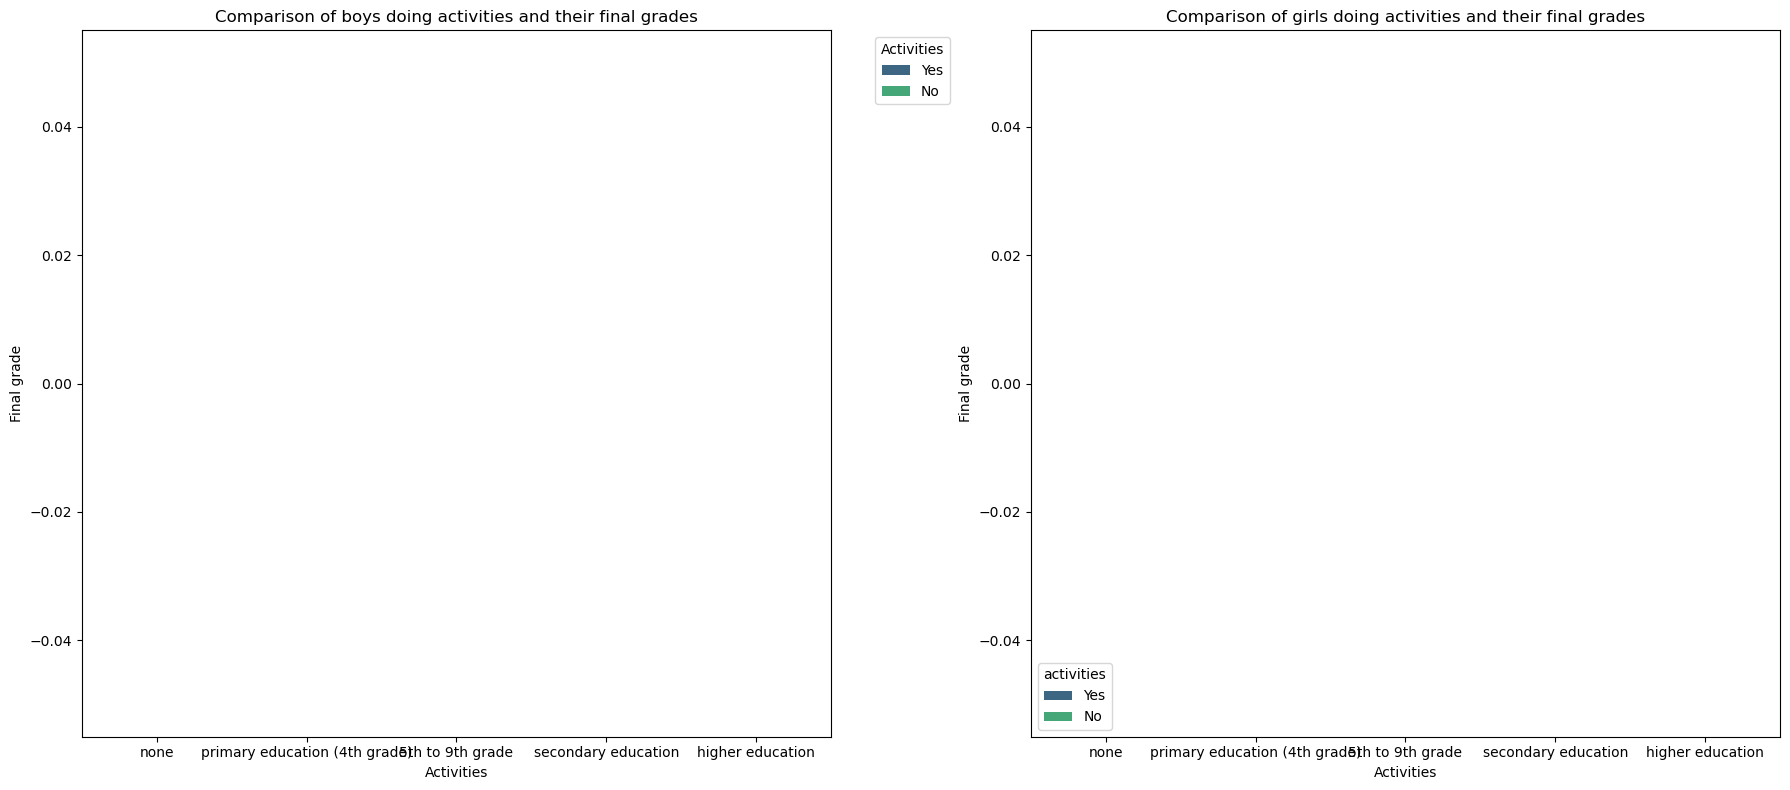

In [40]:
activities_order=["Yes","No"]
fig, ax = plt.subplots(1, 2, figsize=(18, 8))


sns.barplot(x='mother_education', y='class_failures', hue='activities', data=filtered_boy, palette='viridis',order=["none", "primary education (4th grade)","5th to 9th grade",'secondary education',"higher education"],hue_order=activities_order, ax=ax[0],errorbar=None)
ax[0].set_xlabel("Activities")
ax[0].set_ylabel("Final grade")
ax[0].set_title("Comparison of boys doing activities and their final grades")
ax[0].legend(title='Activities', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.barplot(x='mother_education', y='class_failures', hue='activities', data=filtered_girl, palette='viridis',order=['none',"primary education (4th grade)","5th to 9th grade",'secondary education',"higher education"],hue_order=activities_order, ax=ax[1],errorbar=None)
ax[1].set_xlabel("Activities")
ax[1].set_ylabel("Final grade")
ax[1].set_title("Comparison of girls doing activities and their final grades")

plt.tight_layout()
plt.show()

order= ['services','health','teacher','at_home','other']